In [19]:
import pandas as pd

# Load the dataset
iris_ds = pd.read_csv("iris.csv")
print(iris_ds.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [20]:
# make it equal to the course format
samples = iris_ds[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
species = iris_ds["class"].replace({'Iris-setosa': 1, 'Iris-virginica': 2, 'Iris-versicolor': 3})
print(type(samples))
print(samples[:5]) # equivalent to .head() for numpy.ndarray

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


C:\Users\felip\AppData\Local\Temp\ipykernel_25884\4277637433.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  species = iris_ds["class"].replace({'Iris-setosa': 1, 'Iris-virginica': 2, 'Iris-versicolor': 3})


In [21]:
from sklearn.cluster import KMeans

# Use 3 clusters since we know there are 3 types of plants
model = KMeans(n_clusters=3)
model.fit(samples)

labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


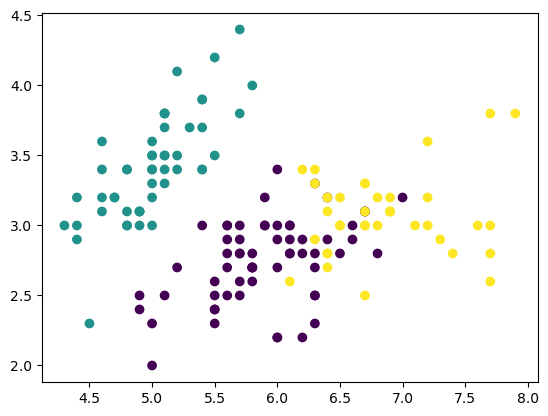

In [22]:
import matplotlib.pyplot as plt
xs=samples[:,0]
ys=samples[:,1]
plt.scatter(xs,ys, c=labels) # c=labels is color by cluster "labels"
plt.show()

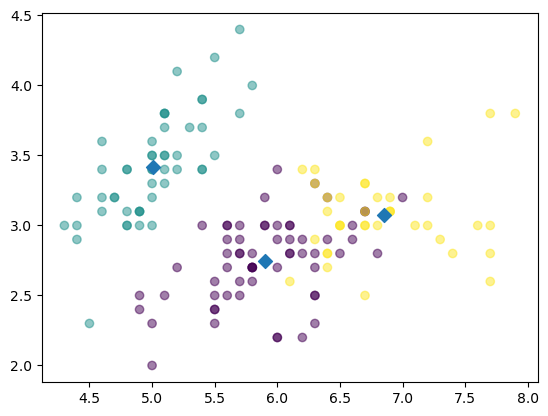

In [23]:
plt.scatter(xs,ys, c=labels, alpha=0.5) # make each point somewhat transparent
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker='D',s=50) # centroids as big diamonds
plt.show()

In [24]:
#print(iris_ds['class'])
#print(type(iris_ds['class']))
#print(type(labels))
df = pd.DataFrame({'labels':labels, 'species':iris_ds["class"].values})
print(df)

ct = pd.crosstab(df['labels'], df['species'])
print(ct)

     labels         species
0         1     Iris-setosa
1         1     Iris-setosa
2         1     Iris-setosa
3         1     Iris-setosa
4         1     Iris-setosa
..      ...             ...
145       2  Iris-virginica
146       0  Iris-virginica
147       2  Iris-virginica
148       2  Iris-virginica
149       0  Iris-virginica

[150 rows x 2 columns]
species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               48              14
1                 50                0               0
2                  0                2              36


In [25]:
print(model.inertia_)

78.94084142614601


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

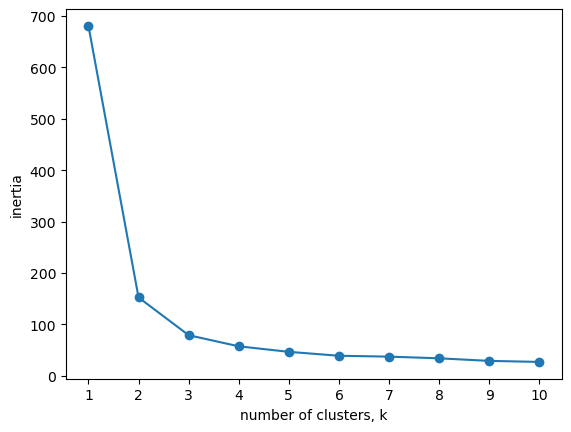

In [26]:
ks = range(1,11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Just out of curiosity, how would a 3D figure of iris look like?

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


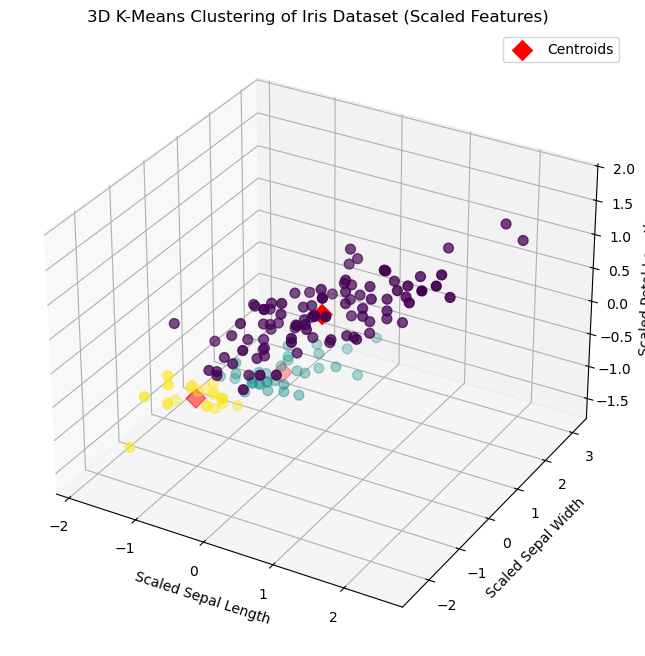

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris_ds = pd.read_csv("iris.csv")

# Extract features
samples = iris_ds[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values

# Feature scaling
scaler = StandardScaler()
samples_scaled = scaler.fit_transform(samples)

# Apply k-means clustering
model = KMeans(n_clusters=3, random_state=42)
model.fit(samples_scaled)
labels = model.predict(samples_scaled)
centroids = model.cluster_centers_

# 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Data points
xs = samples_scaled[:, 0]  # sepal_length
ys = samples_scaled[:, 1]  # sepal_width
zs = samples_scaled[:, 2]  # petal_length
scatter = ax.scatter(xs, ys, zs, c=labels, cmap='viridis', s=50)

# Centroids
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]
centroids_z = centroids[:, 2]
ax.scatter(centroids_x, centroids_y, centroids_z, marker='D', s=100, c='red', label='Centroids')

# Labels and title
ax.set_xlabel('Scaled Sepal Length')
ax.set_ylabel('Scaled Sepal Width')
ax.set_zlabel('Scaled Petal Length')
ax.set_title('3D K-Means Clustering of Iris Dataset (Scaled Features)')
ax.legend()
plt.show()


As we can see it's not that intuitive. How about using the t-SNE method on this same dataset?

C:\Users\felip\AppData\Local\Temp\ipykernel_25884\3617362648.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  species = iris_ds["class"].replace({'Iris-setosa': 1, 'Iris-virginica': 2, 'Iris-versicolor': 3})


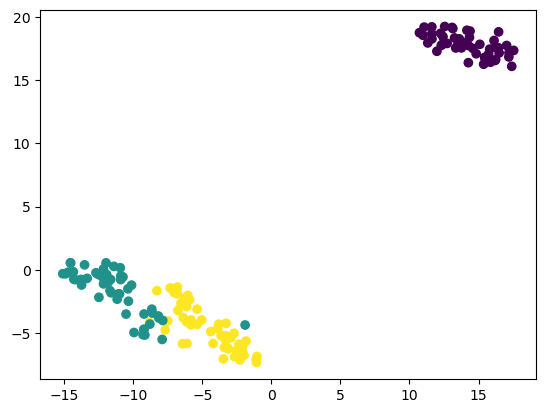

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

samples = iris_ds[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
species = iris_ds["class"].replace({'Iris-setosa': 1, 'Iris-virginica': 2, 'Iris-versicolor': 3})

model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)


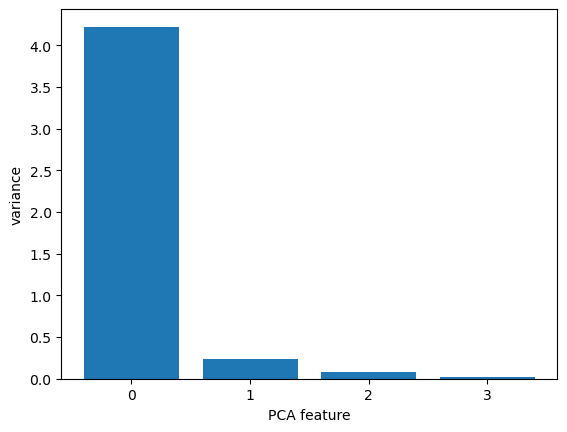

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

samples = iris_ds[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values

pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)

# Make a barplot of the variances
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()


Lets create an arrow on the direction of the mean in one of the dimensions of our samples set

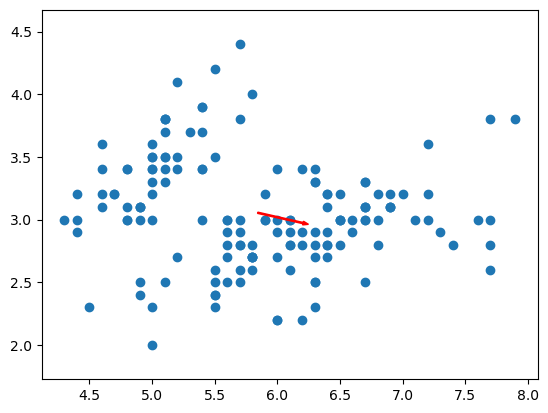

In [30]:
# Make a scatter plot of the untransformed points
plt.scatter(samples[:,0], samples[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(samples)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

Decomposition of Iris dataset into 2 PCA components

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape)

(150, 2)


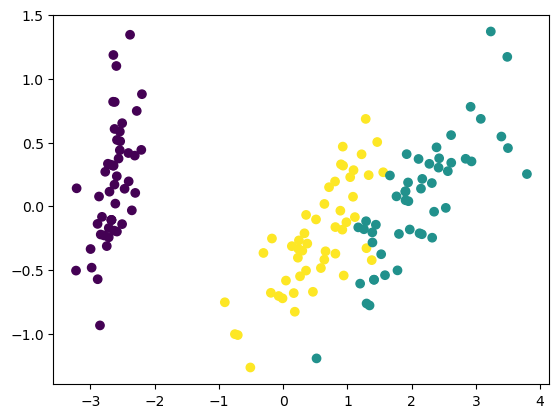

In [32]:
import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c = species)
plt.show()